[View in Colaboratory](https://colab.research.google.com/github/suryatej9195/kaggleCompetitions/blob/master/Kaggle_Comp_Salt_identification_demo.ipynb)

In [1]:
print ('hai')

hai


In [5]:
!pip install imageio
!pip install torch
!pip install kaggle
!pip install pywidgets

    100% |████████████████████████████████| 3.3MB 944kB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio
    100% |████████████████████████████████| 519.5MB 30kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x597ec000 @  0x7faa59d411c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 235kB 4.9MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... -

In [0]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils import data

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryatejmskp","key":"f15a87a44321711550db13b2fcbf94c6"}'}

In [7]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Sep  7 18:09 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 58.5MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 66.8MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 102MB/s]
 93% 152M/163M [00:01<00:00, 121MB/s]
100% 163M/163M [00:01<00:00, 156MB/s]
100% 37.9M/37.9M [00:00<00:00, 57.3MB/s]



In [10]:
!ls
!unzip train.zip

depths.csv   sample_data	    test.zip   train.zip
kaggle.json  sample_submission.csv  train.csv
Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  infla

In [0]:
class TGSSaltDataset(data.Dataset):
  def __init__(self, root_path, file_list):
    self.root_path = root_path
    self.file_list = file_list
  def __len__(self):
    return len(self.file_list)
  def __getitem__(self, index):
    file_id = self.file_list[index]
    # image folder + path
    image_folder = os.path.join(self.root_path, 'images')
    image_path = os.path.join(image_folder, file_id + '.png')
    # label folder + path
    mask_folder = os.path.join(self.root_path, 'masks')
    mask_path = os.path.join(mask_folder, file_id + '.png')
    # read it
    image = np.array(imageio.imread(image_path), dtype=np.uint8)
    mask = np.array(imageio.imread(mask_path), dtype=np.uint8)
    return image, mask
    

In [0]:
# init our new class
train_mask = pd.read_csv('train.csv')
depth = pd.read_csv('depths.csv') # feature to model
train_path = './'
file_list = list(train_mask['id'].values)
dataset = TGSSaltDataset(train_path, file_list)



In [0]:
def plot2x2array(image, mask):
  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(image)
  axarr[1].imshow(mask)
  axarr[0].grid()
  axarr[1].grid()
  axarr[0].set_title('Image')
  axarr[1].set_title('Mask')

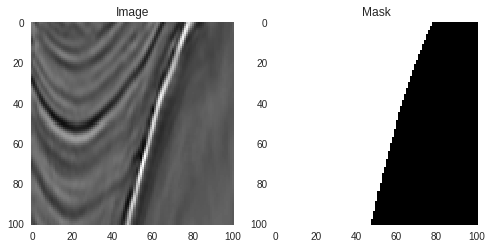

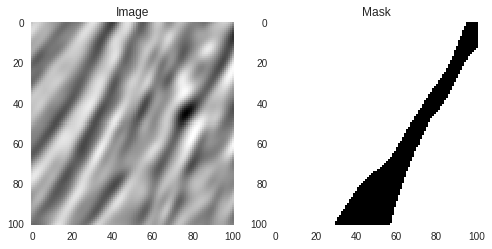

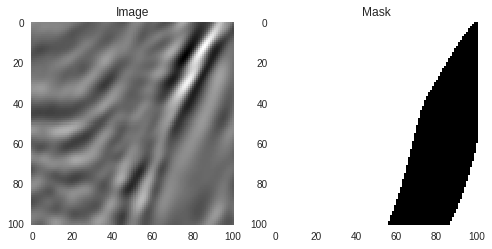

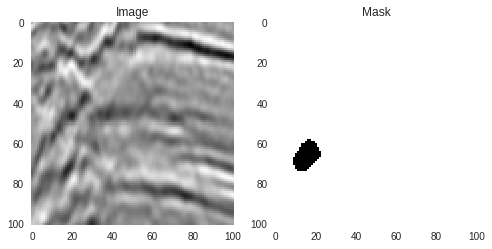

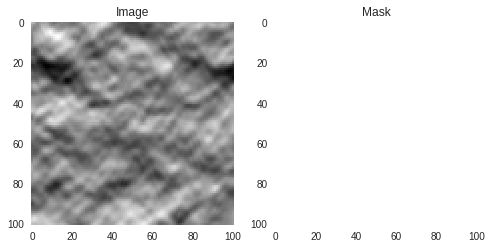

In [14]:
for i in range(5):
  image, mask = dataset[np.random.randint(0, len(dataset))]
  plot2x2array(image, mask)

#black region contains salt
using UNET

Text(0.5,1,'Depth Distribution')

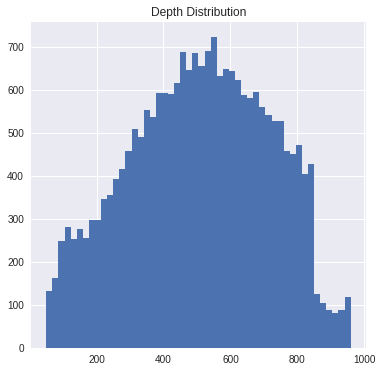

In [15]:
plt.figure(figsize=(6,6))
plt.hist(depth['z'], bins=50)
plt.title('Depth Distribution')

In [0]:
# convert run length encoding to images
def rleToMask(rleString, height, width):
  rows, cols = height, width
  try:
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(row*cols, dtype=np.uint8)
    for index, length in rlePairs:
      index -=1
      img[index:index+length] = 255
    img = img.reshape(cols, row)
    img = img.T
  except:
    img = np.zeros((cols, rows))
  return img
    

    

In [0]:
# function for measuring how salty an image is
def salt_proportion(imgArray):
  try:
    unique, counts = np.unique(imgArray, return_counts = True)
    return counts[1]/10201
  except:
    return 0.0

In [0]:
train_mask['mask'] = train_mask['rle_mask'].apply(lambda x: rleToMask(x, 101, 101))
train_mask['salt_proportion'] = train_mask['mask'].apply(lambda x: salt_proportion(x))


In [19]:
#merge it
merged = train_mask.merge(depth, how='left')
merged.head()

,id,rle_mask,mask,salt_proportion,z
0,575d24d81d,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,843
1,a266a2a9df,5051 5151,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,797


Text(0.5,1,'Proporation of Salt Vs Depth')

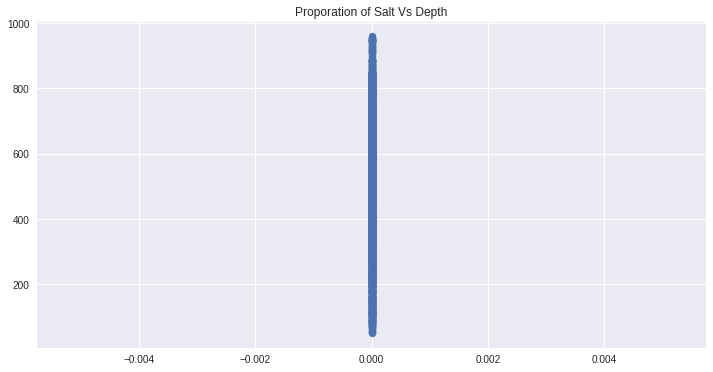

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(merged['salt_proportion'],merged['z'])
plt.title('Proporation of Salt Vs Depth')

In [0]:
# Just how

In [0]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

#Using TensorFlow backend.

In [0]:
im_width = 128
im_height = 128
border = 5
im_chan = 2
n_features = 1


In [23]:
input_img = Input((im_height, im_width, im_chan), name='img')
input_features = Input((n_features,), name='feat')

c1 = Conv2D(8, (3,3), activation='relu', padding='same') (input_img) 
c1 = Conv2D(8, (3,3), activation='relu', padding='same') (c1) 
p1 = MaxPooling2D((2,2)) (c1)

c2 = Conv2D(16, (3,3), activation='relu', padding='same') (p1) 
c2 = Conv2D(16, (3,3), activation='relu', padding='same') (c2) 
p2 = MaxPooling2D((2,2)) (c2)

c3 = Conv2D(32, (3,3), activation='relu', padding='same') (p2) 
c3 = Conv2D(32, (3,3), activation='relu', padding='same') (c3) 
p3 = MaxPooling2D((2,2)) (c3)

c4 = Conv2D(64, (3,3), activation='relu', padding='same') (p3) 
c4 = Conv2D(64, (3,3), activation='relu', padding='same') (c4) 
p4 = MaxPooling2D((2,2)) (c4)

# Join Features information in the depthest layer
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8,8, n_features))(f_repeat)
p4_feat = concatenate([p4, f_conv], -1)

# decoder layer
c5 = Conv2D(128, (3,3), activation='relu', padding='same') (p4_feat) 
c5 = Conv2D(128, (3,3), activation='relu', padding='same') (c5) 

u6 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3,3), activation='relu', padding='same') (u6) 
c6 = Conv2D(64, (3,3), activation='relu', padding='same') (c6) 

u7 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3,3), activation='relu', padding='same') (u7) 
c7 = Conv2D(32, (3,3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3,3), activation='relu', padding='same') (u8) 
c8 = Conv2D(16, (3,3), activation='relu', padding='same') (c8)


u9 = Conv2DTranspose(8, (2,2), strides=(2,2), padding='same') (c8)
u9 = concatenate([u9, c1], axis = 3)
c9 = Conv2D(8, (3,3), activation='relu', padding='same') (u9) 
c9 = Conv2D(8, (3,3), activation='relu', padding='same') (c9)

outputs = Conv2D(1,(1,1), activation='sigmoid')(c9)

model = Model(inputs = [input_img, input_features], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  152         img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [24]:
!pip install ipywidgets

    100% |████████████████████████████████| 112kB 3.1MB/s 
    100% |████████████████████████████████| 2.2MB 6.8MB/s 


In [25]:
import sys, os
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize


train_ids = next(os.walk(train_path+"images"))[2]


# Get and resize train images and masks
X = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path
    
    # Depth
    #X_feat[n] = depth.loc[id_.replace('.png', ''), 'z']
    
    # Load X
    img = load_img(path + '/images/' + id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    
    # Create cumsum x
    x_center_mean = x_img[border:-border, border:-border].mean()
    x_csum = (np.float32(x_img)-x_center_mean).cumsum(axis=0)
    x_csum -= x_csum[border:-border, border:-border].mean()
    x_csum /= max(1e-3, x_csum[border:-border, border:-border].std())

    # Load Y
    mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=True))
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

    # Save images
    X[n, ..., 0] = x_img.squeeze() / 255
    X[n, ..., 1] = x_csum.squeeze()
    y[n] = mask / 255

print('Done!')




Getting and resizing train images and masks ... 


100%|██████████| 4000/4000 [00:25<00:00, 157.35it/s]

Done!


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(X, X_feat, y, test_size=0.15, random_state=42)

In [27]:
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=50, callbacks=callbacks,
                    validation_data=({'img': X_valid, 'feat': X_feat_valid}, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/50
3400/3400 [==============================] - 20s 6ms/step - loss: 0.5209 - val_loss: 0.4376

Epoch 00001: val_loss improved from inf to 0.43764, saving model to model-tgs-salt-1.h5
Epoch 2/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.3959 - val_loss: 0.3565

Epoch 00002: val_loss improved from 0.43764 to 0.35653, saving model to model-tgs-salt-1.h5
Epoch 3/50
3400/3400 [==============================] - 16s 5ms/step - loss: 0.3077 - val_loss: 0.3312

Epoch 00003: val_loss improved from 0.35653 to 0.33124, saving model to model-tgs-salt-1.h5
Epoch 4/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.2685 - val_loss: 0.2573

Epoch 00004: val_loss improved from 0.33124 to 0.25725, saving model to model-tgs-salt-1.h5
Epoch 5/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.2527 - val_loss: 0.2841

Epoch 00005: val_loss did not improve from 0.25725
Epoch 6/50
3400/34

In [28]:
print('Hello')

Hello


In [0]:
from google.colab import files
files.download('model-tgs-salt-1.h5')

In [30]:
!ls

depths.csv  kaggle.json  model-tgs-salt-1.h5  sample_submission.csv  train.csv
images	    masks	 sample_data	      test.zip		     train.zip


In [0]:
files.download('depths.csv')
files.download('sample_submission.csv')
files.download('train.csv')
files.download('test.zip')
files.download('train.zip')

Check Kaggle For more